# Seaborn Part 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Import GPU Statistics CSV

#### The dataset contains of 495 GPU models. It includes the following parameters:

- GPU manufacturer
- GPU class
- Name
- Year of release
- Fab = fabrication process (nm). It defines the size of transistors in a processor. The transistors are the buildings block of any integrated circuit, GPU and CPU included.
- Number of transistors (millions)
- Die(small block of semiconducting material on IC) size
- Memory size in megabytes
- GFLOPS = billions of Floating Operations Per Second
- TDP (thermal design power) = the maximum amount of heat generated by a computer chip or component

In [2]:
df = pd.read_csv('gpus.csv')
df

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0
3,Nvidia,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0
4,Nvidia,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0
...,...,...,...,...,...,...,...,...,...,...,...
490,AMD Radeon,Datacenter,Radeon Instinct MI6,2016,14,5700,232,16384,224.0,5800.0,150.0
491,AMD Radeon,Datacenter,Radeon Instinct MI8,2016,28,8900,596,4096,512.0,8200.0,175.0
492,AMD Radeon,Datacenter,Radeon Instinct MI25,2016,14,12500,510,16384,436.2,12300.0,300.0
493,AMD Radeon,Datacenter,Radeon Instinct MI50,2018,7,13200,331,16384,1024.0,13400.0,300.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       495 non-null    object 
 1   Class              495 non-null    object 
 2   Name               495 non-null    object 
 3   Year               495 non-null    int64  
 4   Fab                495 non-null    int64  
 5   Transistors (mln)  495 non-null    int64  
 6   Die size           495 non-null    int64  
 7   Memory size        495 non-null    int64  
 8   Memory speed       495 non-null    float64
 9   GFLOPS             495 non-null    float64
 10  TDP                495 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 42.7+ KB


In [4]:
max_transistors_per_year = df.groupby('Year')['Transistors (mln)'].max()
max_transistors_per_year

Year
2007      754
2008     1912
2009     4308
2010     3100
2011     6000
2012     7080
2013     8626
2014    14160
2015     8900
2016    17800
2017    21100
2018    21100
2019    26460
2020    54200
Name: Transistors (mln), dtype: int64

In [5]:
type(max_transistors_per_year)

pandas.core.series.Series

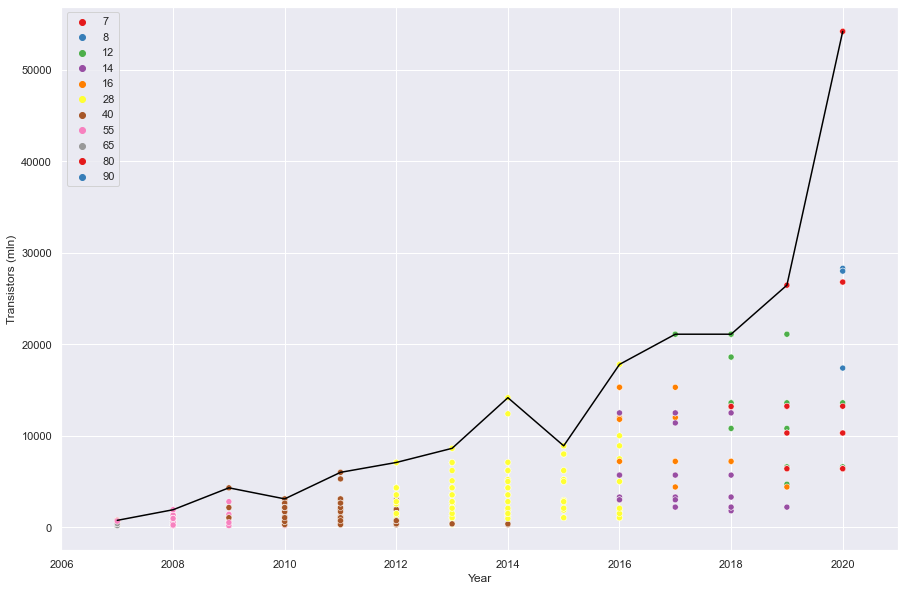

In [6]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Transistors (mln)',
                     hue='Fab',
                     legend='full',
                     data=df,
                     palette=sns.color_palette("Set1", n_colors=len(df.Fab.unique())))
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
ax.set_xlim(2006, 2021)
plt.show()

### Transistor density

In [7]:
df['Transistors/mm2'] = df['Transistors (mln)'] / df['Die size']
df

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0,1.653543
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0,1.653543
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0,2.441860
3,Nvidia,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0,4.561404
4,Nvidia,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0,1.653543
...,...,...,...,...,...,...,...,...,...,...,...,...
490,AMD Radeon,Datacenter,Radeon Instinct MI6,2016,14,5700,232,16384,224.0,5800.0,150.0,24.568966
491,AMD Radeon,Datacenter,Radeon Instinct MI8,2016,28,8900,596,4096,512.0,8200.0,175.0,14.932886
492,AMD Radeon,Datacenter,Radeon Instinct MI25,2016,14,12500,510,16384,436.2,12300.0,300.0,24.509804
493,AMD Radeon,Datacenter,Radeon Instinct MI50,2018,7,13200,331,16384,1024.0,13400.0,300.0,39.879154


(0.0, 70.0)

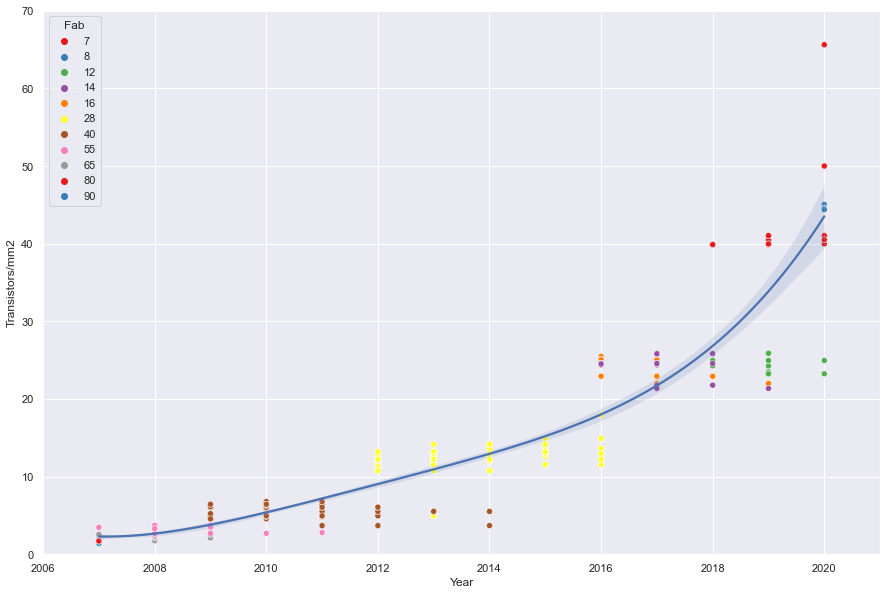

In [8]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Transistors/mm2',
                     hue='Fab',
                     legend='full',
                     data=df,
                     palette=sns.color_palette("Set1", n_colors=len(df.Fab.unique())))
ax = sns.regplot(x='Year',
                 y='Transistors/mm2',
                 data=df,
                 scatter=False,
                 ax=ax.axes,
                 order=4)
ax.set_xlim(2006, 2021)
ax.set_ylim(0, 70)


### GPU’s Class vs TDP

In [9]:
df['Class'].unique()

array(['Desktop', 'Workstation', 'Datacenter'], dtype=object)

In [10]:
df.describe()

,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,2012.880808,33.957576,4712.228283,307.777778,5493.793939,201.327709,3548.423818,145.768485,12.988545
std,3.681106,18.034835,6645.950201,210.542453,7834.893178,255.778339,5102.158541,98.177831,10.980187
min,2007.000000,7.000000,180.000000,57.000000,64.000000,3.200000,14.400000,12.000000,1.407025
25%,2010.000000,28.000000,754.000000,132.000000,1024.000000,51.200000,480.000000,59.000000,4.949153
50%,2013.000000,28.000000,2200.000000,256.000000,2048.000000,112.100000,1344.000000,134.000000,12.040816
75%,2016.000000,40.000000,6100.000000,438.000000,6144.000000,256.000000,4636.000000,225.000000,14.155251
max,2020.000000,90.000000,54200.000000,1192.000000,65536.000000,2048.000000,40000.000000,600.000000,65.617433


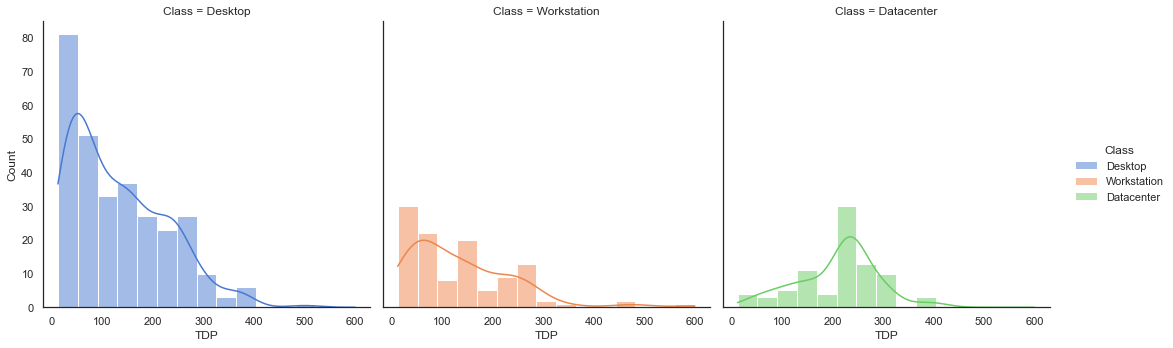

In [11]:
sns.set(style="white", palette="muted", color_codes=True)
sns.displot(data=df, x="TDP", hue="Class", col="Class", kde=True)

In [12]:
df.loc[df['Class']=='Datacenter']['TDP'].median()

225.0

In [13]:
df.loc[df['Class']=='Desktop']['TDP'].skew()

0.8215194558499305

In [14]:
df.loc[df['Class']=='Workstation']['TDP'].skew()

1.5345385177070925

In [15]:
df.loc[df['Class']=='Datacenter']['TDP'].skew()

-0.27312304470699533

### TDP on FAB from 2 Manufacturers

In [16]:
df['Manufacturer'].unique()

array(['Nvidia', 'AMD Radeon'], dtype=object)

In [17]:
sorted(df['Fab'].unique())

[7, 8, 12, 14, 16, 28, 40, 55, 65, 80, 90]

In [18]:
df.loc[df['Manufacturer']=='Nvidia']['TDP'].describe()

count    245.000000
mean     152.057143
std       95.553654
min       12.000000
25%       64.000000
50%      150.000000
75%      225.000000
max      600.000000
Name: TDP, dtype: float64

In [19]:
df.loc[df['Manufacturer']=='AMD Radeon']['TDP'].describe()

count    250.000000
mean     139.605600
std      100.492429
min       15.000000
25%       55.000000
50%      122.500000
75%      218.750000
max      500.000000
Name: TDP, dtype: float64

[(0.0, 700.0)]

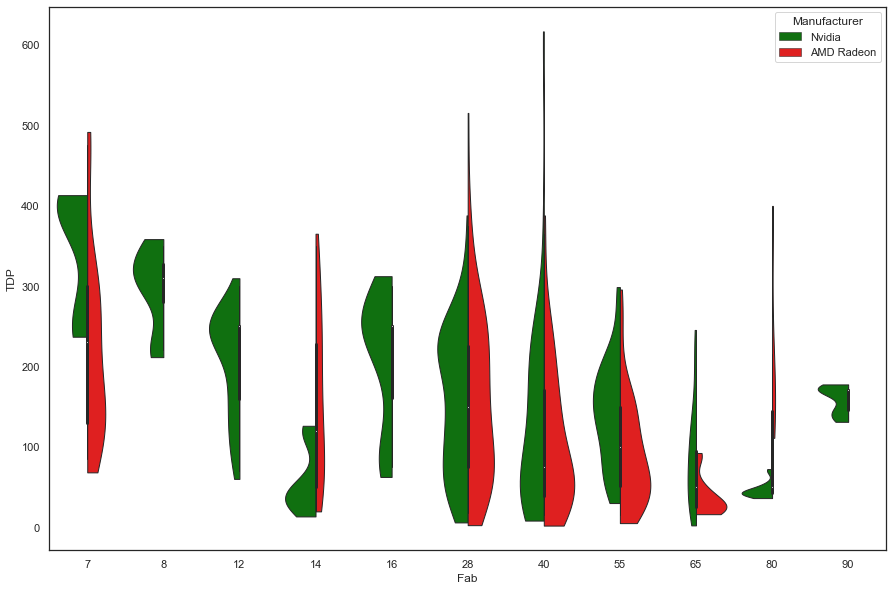

In [20]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='Fab', 
               y='TDP', 
               hue='Manufacturer', 
               data=df, 
               split=True,  # split the violin half
               bw=.5,       # scale factor for kernel bandwidth
               cut=0.3,     # distance, in units of bandwidth size
               linewidth=1,
               palette=sns.color_palette(['green', 'red']))
ax.set(ylim=(0, 700))

## Stripplot and pointplot

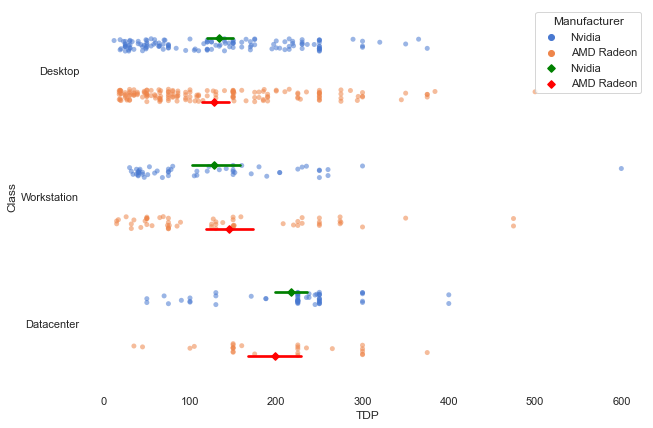

In [21]:
plt.subplots(figsize=(10, 7))
sns.despine(bottom=True, left=True)

sns.stripplot(x="TDP", y="Class", hue="Manufacturer",
              data=df, dodge=.5, alpha=.55, zorder=1)

sns.pointplot(x="TDP", y="Class", hue="Manufacturer",
              data=df, dodge=.5, join=False, 
              markers="D", scale=.75, errorbar=('ci', 95),
             palette=sns.color_palette(['green', 'red'])
             )

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title="Class",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

## lmplot() associates with regplot()

GFLOPS = billions of Floating Operations Per Second

<AxesSubplot:xlabel='Year', ylabel='GFLOPS'>

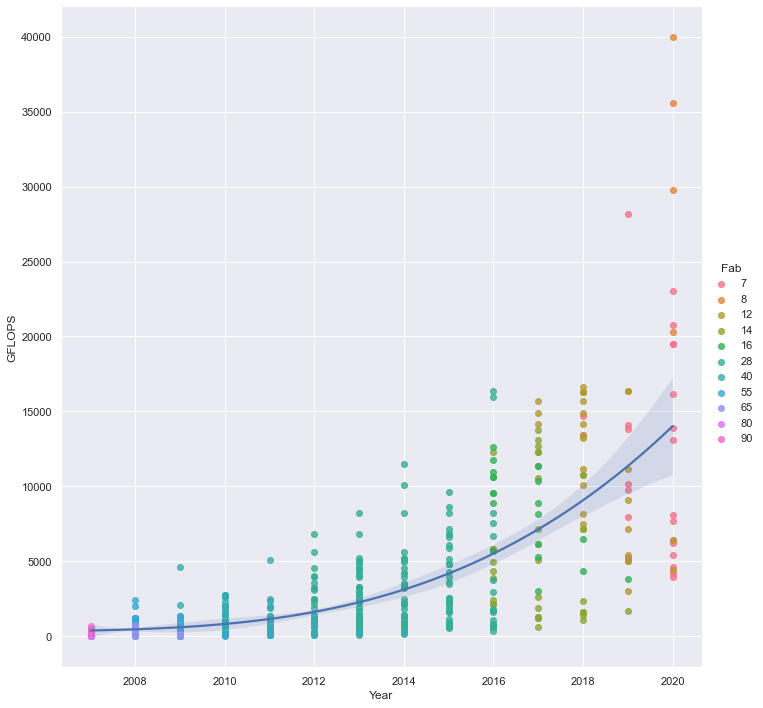

In [106]:
sns.set_theme()
sns.lmplot(x='Year', y='GFLOPS', data=df, hue='Fab', fit_reg=False, height=10)
sns.regplot(x='Year', y='GFLOPS', data=df, scatter=False,  order=3)

## Compate the number of GFLOPS per million of transistors

In [29]:
df['GFLOPS/transistors'] = df['GFLOPS'] / df['Transistors (mln)']
df

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2,GFLOPS/transistors
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0,1.653543,0.068571
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0,1.653543,0.137143
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0,2.441860,0.116190
3,Nvidia,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0,4.561404,0.075769
4,Nvidia,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0,1.653543,0.137143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,AMD Radeon,Datacenter,Radeon Instinct MI6,2016,14,5700,232,16384,224.0,5800.0,150.0,24.568966,1.017544
491,AMD Radeon,Datacenter,Radeon Instinct MI8,2016,28,8900,596,4096,512.0,8200.0,175.0,14.932886,0.921348
492,AMD Radeon,Datacenter,Radeon Instinct MI25,2016,14,12500,510,16384,436.2,12300.0,300.0,24.509804,0.984000
493,AMD Radeon,Datacenter,Radeon Instinct MI50,2018,7,13200,331,16384,1024.0,13400.0,300.0,39.879154,1.015152


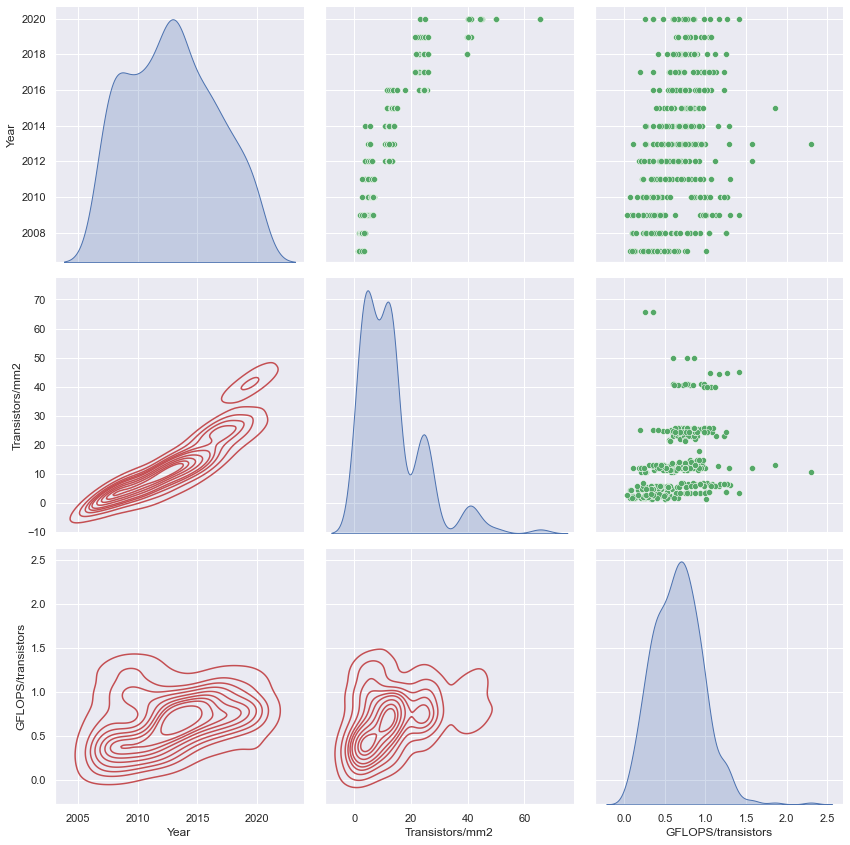

In [86]:
ax = sns.PairGrid(df[['Year', 'Transistors/mm2', 'GFLOPS/transistors']], 
                 diag_sharey=False, height=4)
ax.map_upper(sns.scatterplot, color='g')
ax.map_lower(sns.kdeplot, color='r' )
ax.map_diag(sns.kdeplot, lw=1, fill=True)

plt.show()

## Memory speed of two manufacturers

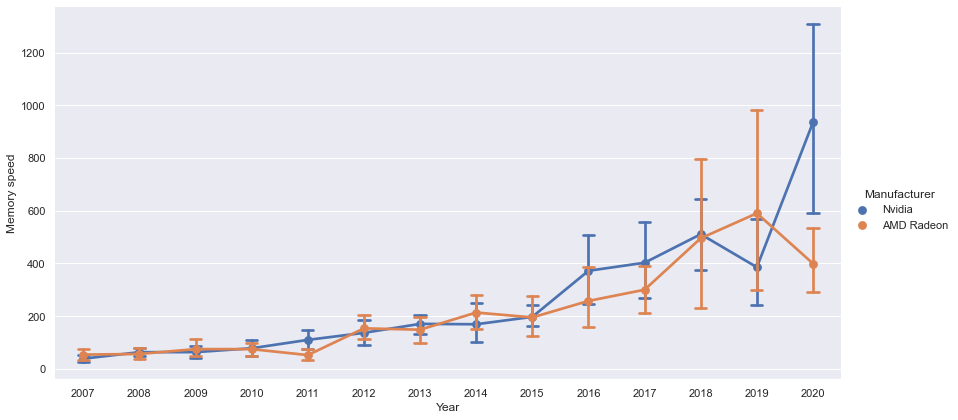

In [89]:
ax = sns.catplot(x="Year", y="Memory speed", hue="Manufacturer", height=6, aspect=2,
                 capsize=.2, kind="point", data=df)
plt.show()

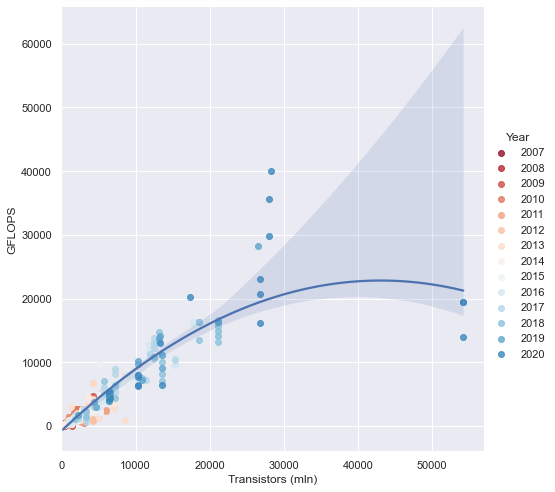

In [93]:
ax = sns.lmplot(x='Transistors (mln)', y='GFLOPS', data=df, hue='Year', fit_reg=False,
                palette=sns.color_palette('RdBu', n_colors=16), height=7)
sns.regplot(x='Transistors (mln)', y='GFLOPS', data=df, scatter=False, ax=ax.axes[0, 0], order=2)
ax.axes[0, 0].set_xlim((0, 57000))
plt.show()

In [121]:
df.loc[df['Transistors (mln)'] == df['Transistors (mln)'].max()]

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2,GFLOPS/transistors
239,Nvidia,Datacenter,GRID A100,2020,7,54200,826,49152,1866.0,13890.0,400.0,65.617433,0.256273
240,Nvidia,Datacenter,A100 SXM4,2020,7,54200,826,40960,1555.0,19490.0,400.0,65.617433,0.359594
241,Nvidia,Datacenter,A100 PCIe,2020,7,54200,826,40960,1555.0,19490.0,250.0,65.617433,0.359594


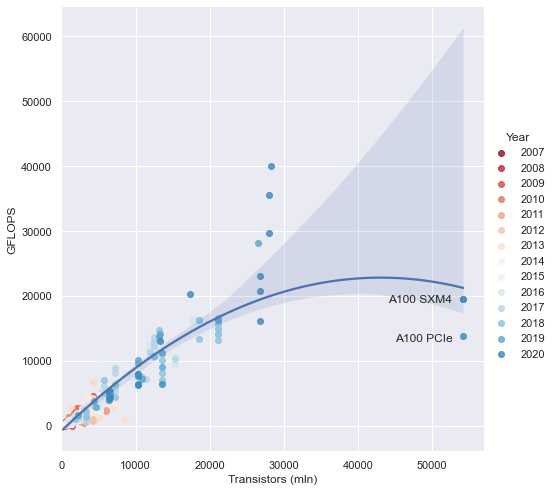

In [92]:
ax = sns.lmplot(x='Transistors (mln)', y='GFLOPS', data=df, hue='Year', fit_reg=False,
                palette=sns.color_palette('RdBu', n_colors=16), height=7)
sns.regplot(x='Transistors (mln)', y='GFLOPS', data=df, scatter=False, ax=ax.axes[0, 0], order=2)
plt.text(44000, 19000, 'A100 SXM4')
plt.text(45000, 13000, 'A100 PCIe')
ax.axes[0, 0].set_xlim((0, 57000))
plt.show()

## growth of GFLOPS per number of transistors

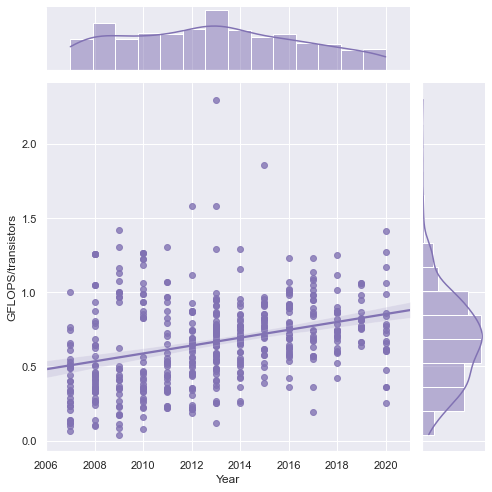

In [122]:
sns.jointplot(x='Year', y='GFLOPS/transistors', data=df,
              kind="reg", truncate=False, marginal_kws={'bins': 14},
              xlim=(2006, 2021),
              color="m", height=7)
plt.show()